In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('https://raw.githubusercontent.com/krishnanandgs/aitraining/main/assignment/testdata/fraudtest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df.shape

(30001, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30001 non-null  int64  
 1   trans_date_trans_time  30001 non-null  object 
 2   cc_num                 30001 non-null  float64
 3   merchant               30001 non-null  object 
 4   category               30001 non-null  object 
 5   amt                    30001 non-null  float64
 6   first                  30001 non-null  object 
 7   last                   30001 non-null  object 
 8   gender                 30001 non-null  object 
 9   street                 30001 non-null  object 
 10  city                   30001 non-null  object 
 11  state                  30001 non-null  object 
 12  zip                    30001 non-null  int64  
 13  lat                    30001 non-null  float64
 14  long                   30001 non-null  float64
 15  ci

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,30001.000000,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,3.000100e+04,3.000100e+04,30001.000000,30001.000000,30001.000000
mean,15000.000000,4.107637e+17,69.180050,48519.959701,38.535170,-90.044074,9.070049e+04,1.372233e+09,38.531662,-90.045745,0.004333
std,8660.687049,1.299653e+18,133.852775,26775.253626,5.049959,13.545256,3.062812e+05,2.597829e+05,5.085863,13.556114,0.065685
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.584303,0.000000
25%,7500.000000,1.800460e+14,9.570000,25526.000000,34.668900,-96.727000,7.590000e+02,1.371986e+09,34.757117,-96.759276,0.000000
50%,15000.000000,3.518760e+15,46.290000,48043.000000,39.371600,-87.456900,2.470000e+03,1.372252e+09,39.375258,-87.351373,0.000000
75%,22500.000000,4.629450e+15,82.600000,71960.000000,42.014400,-80.128400,2.047800e+04,1.372475e+09,41.974428,-80.187714,0.000000
max,30000.000000,4.992350e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372636e+09,66.669356,-66.955602,1.000000


In [7]:
df.nunique()

Unnamed: 0               30001
trans_date_trans_time    11691
cc_num                     889
merchant                   693
category                    14
amt                      12848
first                      338
last                       466
gender                       2
street                     909
city                       837
state                       50
zip                        898
lat                        896
long                       896
city_pop                   823
job                        475
dob                        895
trans_num                30001
unix_time                29395
merch_lat                29978
merch_long               29983
is_fraud                     2
dtype: int64

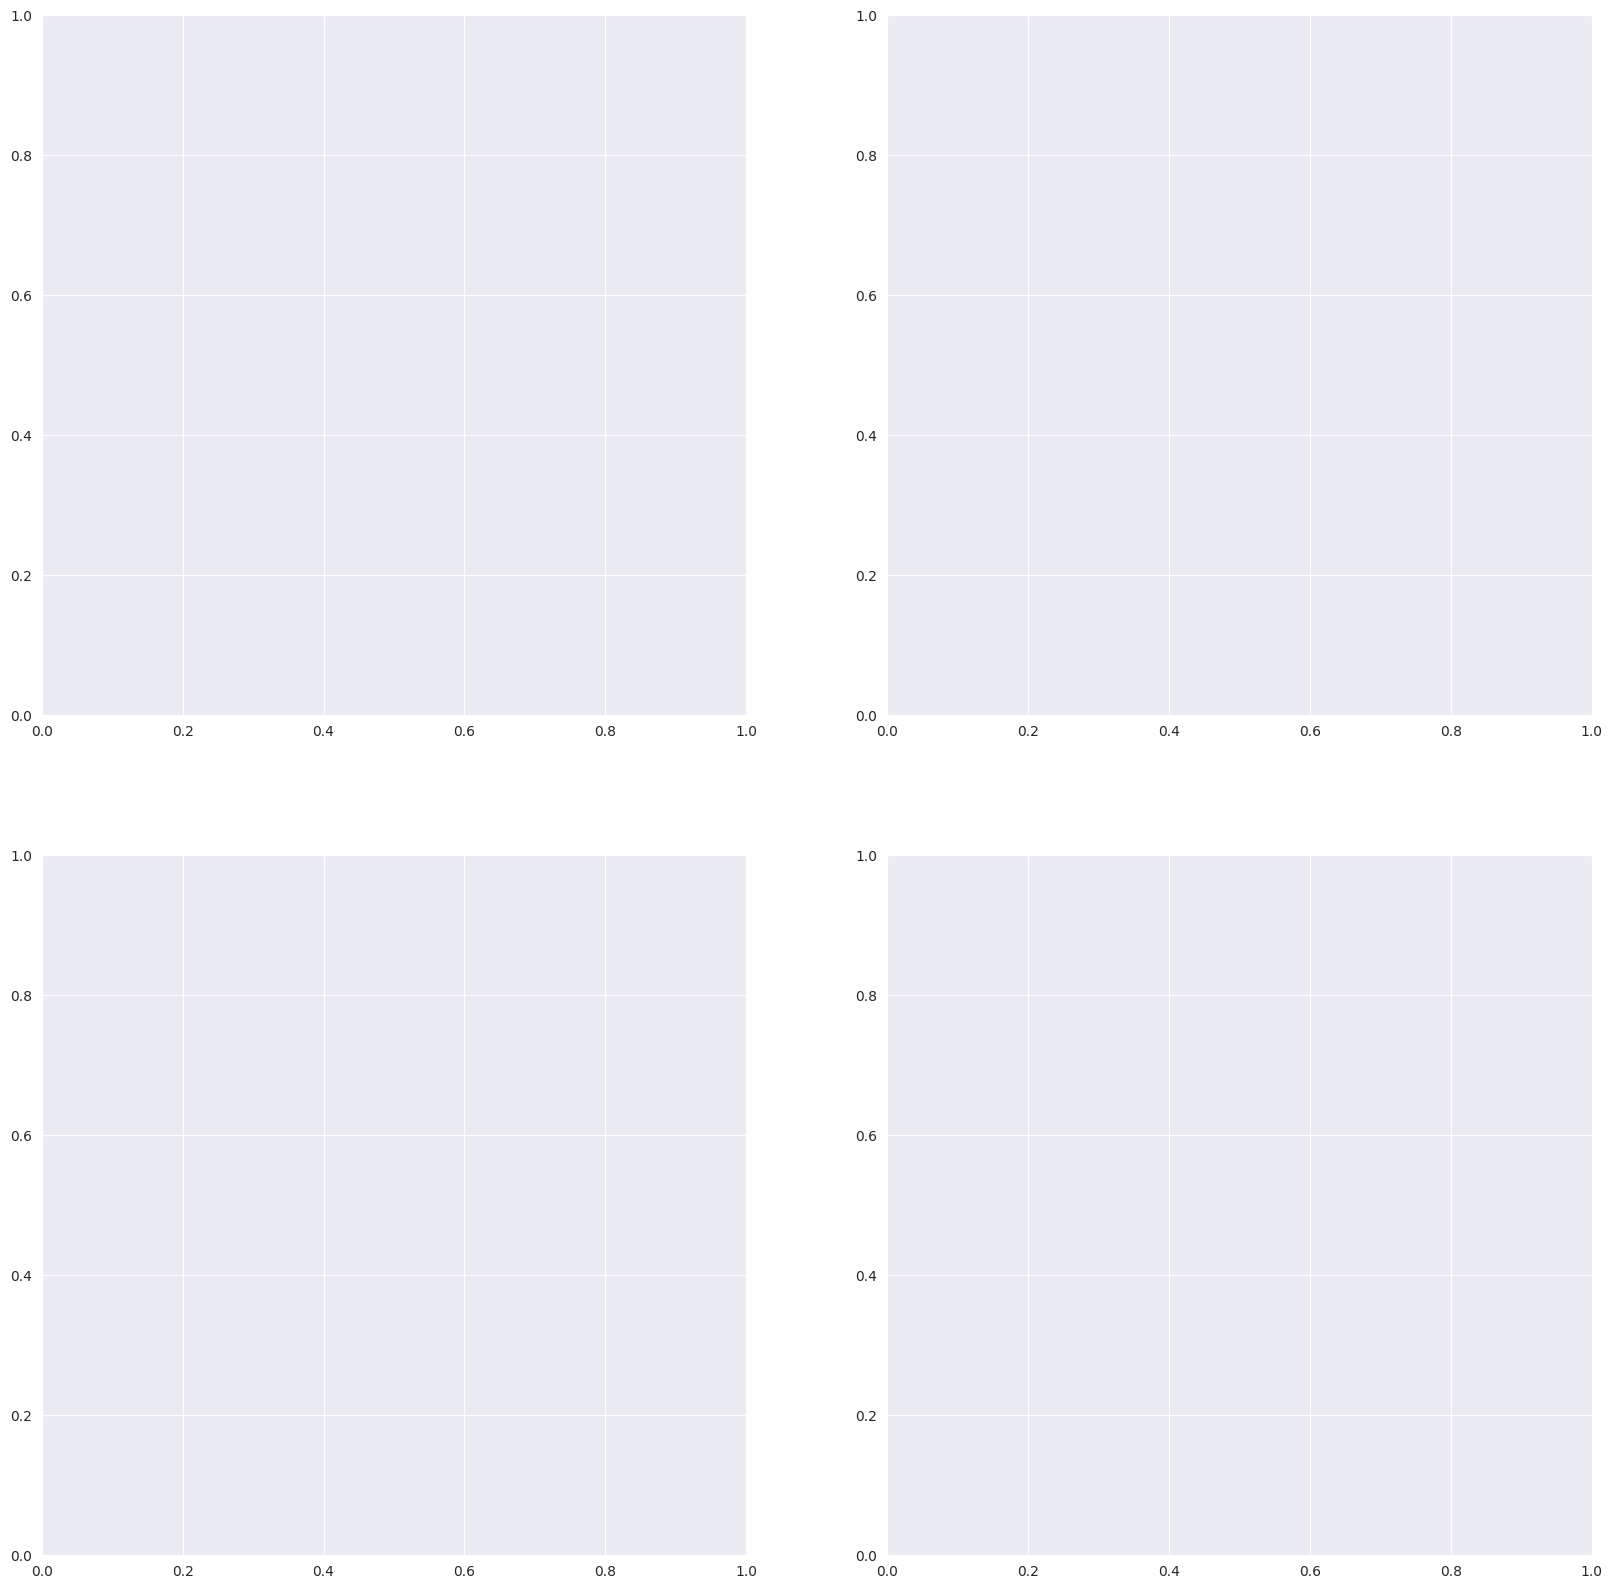

In [9]:
#Data Visulization
fig, axes = plt.subplots(2,2, figsize=(20,20))



gender
F    1157063.78
M     918406.89
Name: amt, dtype: float64


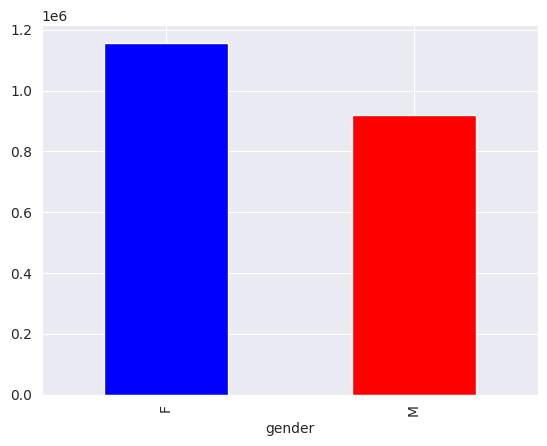

In [10]:
# Total amount spend by gender
print(df.groupby('gender')['amt'].sum())
colors = ['b','r']
df.groupby('gender')['amt'].sum().plot(kind='bar',color=colors)
plt.show()

In [11]:
# drop unnecessary columns 
df = df.drop(columns=['Unnamed: 0','trans_date_trans_time','lat','long','city_pop','zip','merch_lat','merch_long','unix_time'])

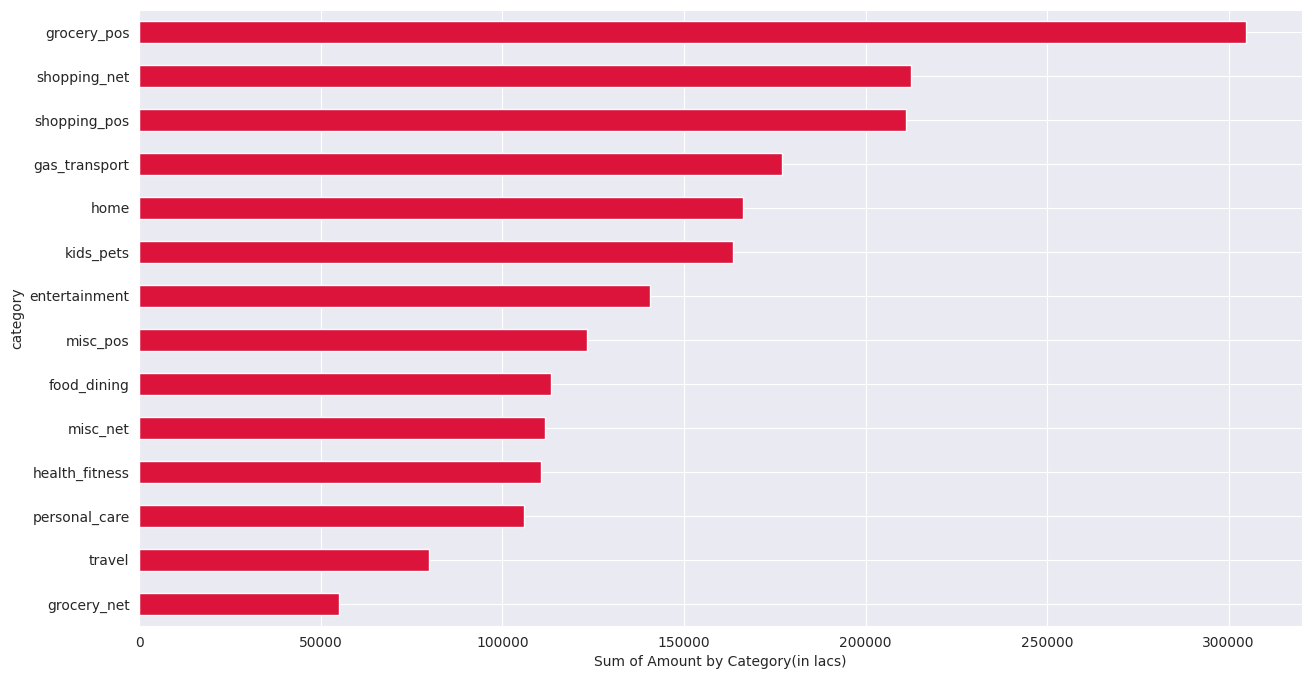

In [14]:
# Category wise total amount 
plt.figure(figsize=(15,8))
df.groupby('category')['amt'].sum().sort_values(ascending=True).plot(kind='barh',color='crimson')
plt.xlabel('Sum of Amount by Category(in lacs)')
plt.show()

In [15]:
fraud_count_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)
fraud_count_by_city = fraud_count_by_city[fraud_count_by_city > 0]

df2 = pd.DataFrame(data = fraud_count_by_city).reset_index()
df2 = df2.rename(columns={'is_fraud':'total_fraud'})
df2

,city,total_fraud
0,Viola,14
1,Heislerville,13
2,Springville,12
3,Louisville,11
4,Gadsden,10
5,Issaquah,9
6,Highland,9
7,Vero Beach,9
8,Akron,9
9,Steuben,8


In [16]:
fraud_count_by_merchant = df.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)
fraud_count_by_merchant = fraud_count_by_merchant[fraud_count_by_merchant > 0]

df3 = pd.DataFrame(data=fraud_count_by_merchant).reset_index()
df3.rename(columns={'is_fraud':'total_fraud'},inplace=True)
df3

,merchant,total_fraud
0,fraud_Sawayn PLC,3
1,"fraud_Schultz, Simonis and Little",3
2,fraud_Schumm PLC,3
3,"fraud_Osinski, Ledner and Leuschke",3
4,"fraud_Rodriguez, Yost and Jenkins",2
...,...,...
101,"fraud_Langworth, Boehm and Gulgowski",1
102,"fraud_Tillman, Fritsch and Schmitt",1
103,fraud_Bins-Rice,1
104,"fraud_Labadie, Treutel and Bode",1


In [17]:
df4 = pd.pivot_table(data=df,index=['state'],columns='gender',values='is_fraud',aggfunc='sum',fill_value=0)
df4

gender,F,M
state,,
AK,0,0
AL,10,0
AR,14,0
AZ,0,0
CA,0,0
CO,0,0
CT,0,0
DC,0,0
FL,9,0


In [18]:
df5 = pd.pivot_table(data=df,index=df['job'],values='is_fraud',columns=df['is_fraud'],aggfunc='sum',fill_value=0)
df5

is_fraud,0,1
job,,
Academic librarian,0,0
"Accountant, chartered certified",0,0
"Accountant, chartered public finance",0,0
Accounting technician,0,0
Acupuncturist,0,0
...,...,...
Water engineer,0,0
Water quality scientist,0,0
Web designer,0,0


In [19]:
df.drop(columns=['cc_num','first','last','street','dob','trans_num'],inplace=True)

In [20]:
le = LabelEncoder()
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = le.fit_transform(df[columns])

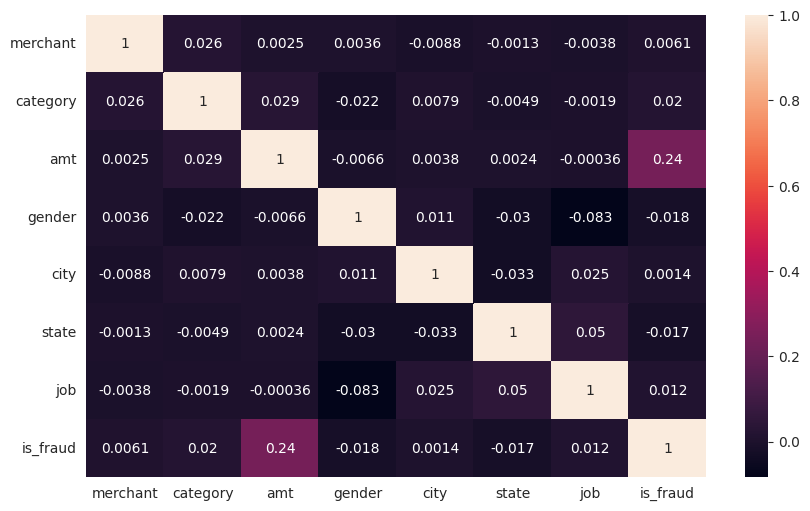

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
skewd = scipy.stats.skew(df.select_dtypes(np.number))
skewd_df = pd.DataFrame(skewd, df.columns)
skewd_df

,0
merchant,0.003408
category,0.017779
amt,13.947072
gender,0.205672
city,0.002416
state,-0.187077
job,0.004603
is_fraud,15.092424


In [23]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1:]

In [24]:
#Scaling

sc = StandardScaler()
data = sc.fit_transform(data)

In [25]:
x_train , x_test , y_train , y_test = train_test_split(data , target , test_size = .2, random_state=42)

In [26]:
#Model selection
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model_rfc = RandomForestClassifier()

In [27]:
model_lr.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_rfc.fit(x_train,y_train)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_4410/2174892721.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn.fit(x_train,y_train)
/tmp/ipykernel_4410/2174892721.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred_lr = model_lr.predict(x_test)
y_pred_dt = model_dt.predict(x_test)
y_pred_knn = model_knn.predict(x_test)
y_pred_rfc = model_rfc.predict(x_test)

In [29]:
lr_score = accuracy_score(y_test,y_pred_lr)
dt_score = accuracy_score(y_test,y_pred_dt)
knn_score = accuracy_score(y_test, y_pred_knn)
rfc_score = accuracy_score(y_test,y_pred_rfc)

print(f'Logistic Regression            :{lr_score}')
print(f'Decision Tree Classifier       :{dt_score}')
print(f'K-Nearest Neighbors Classifier :{knn_score}')
print(f'RandomForest Classifier        :{rfc_score}')

Logistic Regression            :0.9950008331944676
Decision Tree Classifier       :0.9966672221296451
K-Nearest Neighbors Classifier :0.9958340276620563
RandomForest Classifier        :0.9965005832361273
